In [1]:
from scipy import io
import pandas as pd
import umap # First time you run this enter pip install umap-learn in your Anaconda Prompt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [2]:
norm = 'E-GEOD-100911.aggregated_filtered_normalised_counts.mtx'
c = 'E-GEOD-100911.aggregated_filtered_normalised_counts.mtx_cols'
r = 'E-GEOD-100911.aggregated_filtered_normalised_counts.mtx_rows'
cols = []
rows = []
data = io.mmread(norm)
with open(c) as file:
    for line in file:
        cols.append(line.rstrip())

# with open(r) as file:
#     for line in file:
#         rows.append(line.rstrip().split('\t')[0])
# arr = data.toarray()

In [3]:
# norm_counts = pd.DataFrame(arr, index = rows, columns = cols)
# norm_counts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17432 entries, ENSDARG00000000001 to ENSDARG00000117200
Columns: 246 entries, SRR5810686 to SRR5810931
dtypes: float64(246)
memory usage: 32.8+ MB


In [4]:
# This was run to convert the gene transcript IDs to KEGG IDs, since this process took so long
# the result was saved to a csv (geneID.csv) file and this code is not needed anymore. 

# from Bio import Entrez
# import time
# import csv

# Entrez.email = "mdpouls1@gmail.com"
# geneIDs = []
# rowsTest = rows[15000:]
# i = 0
# while i < len(rowsTest):
#     for t in range(3):
#         if i < len(rowsTest):
#             handle = Entrez.esearch(db="gene", term=rowsTest[i])
#             record = Entrez.read(handle)
#             if len(record['IdList']) == 1:
#                 geneIDs.append(record['IdList'][0])
#             elif len(record['IdList']) > 1:
#                 geneIDs.append('multiple')
#             else:
#                 geneIDs.append('NaN')
#             handle.close()
#             i += 1
#     time.sleep(1)

# with open('geneID.csv', 'a') as f:
#     for gene in geneIDs:
#         f.write('{},'.format(gene))


' This was run to convert the gene transcript IDs to KEGG IDs, since this process took so long\n    the result was saved to a csv (geneID.csv) file and this code is not needed anymore. \n\nfrom Bio import Entrez\nimport time\nimport csv\n\nEntrez.email = "mdpouls1@gmail.com"\ngeneIDs = []\nrowsTest = rows[15000:]\ni = 0\nwhile i < len(rowsTest):\n    for t in range(3):\n        if i < len(rowsTest):\n            handle = Entrez.esearch(db="gene", term=rowsTest[i])\n            record = Entrez.read(handle)\n            if len(record[\'IdList\']) == 1:\n                geneIDs.append(record[\'IdList\'][0])\n            elif len(record[\'IdList\']) > 1:\n                geneIDs.append(\'multiple\')\n            else:\n                geneIDs.append(\'NaN\')\n            handle.close()\n            i += 1\n    time.sleep(1)\n\nwith open(\'geneID.csv\', \'a\') as f:\n    for gene in geneIDs:\n        f.write(\'{},\'.format(gene))\n'

In [3]:
ID_Data = pd.read_csv('geneID.csv')
IDs = ID_Data.columns

In [5]:
# norm_counts['geneIDs'] = IDs
# norm_counts.head(10)

In [6]:
# with open('dataFile.txt', 'w') as file:
#     file.write(' '.join(norm_counts['geneIDs'].to_list()))

In [7]:
annotationData = pd.read_table('uniprotData.tab')

In [8]:
annotationData = annotationData.rename(columns={"yourlist:M20210331A94466D2655679D1FD8953E075198DA81B3BDFU": "Ids"})

In [9]:
annotationData = annotationData.drop("yourlist:M20210331A94466D2655679D1FD8953E075198DA81B3B2BO", axis=1)

In [10]:
annotationData.head()


,Ids,Entry,Entry name,Status,Protein names,Gene names,Organism,Length,Pathway,Function [CC],Tissue specificity,Developmental stage,Gene ontology (biological process),Gene ontology IDs,Cross-reference (KEGG),Annotation,Keywords
0,368418,Q90X48,S35A5_DANRE,reviewed,Probable UDP-sugar transporter protein SLC35A5...,slc35a5 si:bZ20I5.1 zgc:66231,Danio rerio (Zebrafish) (Brachydanio rerio),440,NaN,NaN,NaN,NaN,carbohydrate transport [GO:0008643],GO:0005794; GO:0008643; GO:0015165; GO:0030173,dre:368418;,2 out of 5,Glycoprotein;Membrane;Reference proteome;Sugar...
1,64604,Q90X44,NRF1_DANRE,reviewed,Nuclear respiratory factor 1 (Nrf-1) (Not real...,nrf1,Danio rerio (Zebrafish) (Brachydanio rerio),514,NaN,FUNCTION: Probable transcription factor that i...,NaN,DEVELOPMENTAL STAGE: Expressed in the developi...,cellular response to cold [GO:0070417]; multic...,GO:0000978; GO:0001046; GO:0001895; GO:0003407...,dre:64604;,5 out of 5,Activator;Alternative splicing;DNA-binding;Dev...
2,368425,Q7ZUF3,Q7ZUF3_DANRE,unreviewed,Ube2h protein (Ubiquitin-conjugating enzyme E2...,ube2h,Danio rerio (Zebrafish) (Brachydanio rerio),183,NaN,NaN,NaN,NaN,protein polyubiquitination [GO:0000209]; ubiqu...,GO:0000209; GO:0005524; GO:0005634; GO:0006511...,dre:368425;,2 out of 5,ATP-binding;Nucleotide-binding;Proteomics iden...
3,327272,Q6P2U7,Q6P2U7_DANRE,unreviewed,Na(+)/H(+) exchange regulatory cofactor NHE-RF,slc9a3r1a slc9a3r1 slc9a3r2,Danio rerio (Zebrafish) (Brachydanio rerio),384,NaN,FUNCTION: Scaffold protein that connects plasm...,NaN,NaN,otic vesicle development [GO:0071599]; protein...,GO:0001726; GO:0005102; GO:0005902; GO:0006612...,dre:327272;,4 out of 5,Cell projection;Membrane;Proteomics identifica...
4,327272,Q7ZVX1,Q7ZVX1_DANRE,unreviewed,Na(+)/H(+) exchange regulatory cofactor NHE-RF,slc9a3r1a slc9a3r1 slc9a3r2,Danio rerio (Zebrafish) (Brachydanio rerio),386,NaN,FUNCTION: Scaffold protein that connects plasm...,NaN,NaN,otic vesicle development [GO:0071599]; protein...,GO:0001726; GO:0005102; GO:0005902; GO:0006612...,dre:327272;,4 out of 5,Cell projection;Membrane


In [11]:
# import pandas as pd
# norm_counts = pd.read_csv('norm_counts_data.csv')


In [366]:
# norm_counts = norm_counts.set_index('Unnamed: 0')
# norm_transpose = norm_counts.transpose()
# norm_transpose.head()

In [367]:
# norm_transpose_dropped = norm_transpose.drop('geneIDs')
# norm_transpose_dropped


In [368]:
# geneID_dict['64604']

In [338]:
# #comvert the gene ontology codes to dummy columns in a dataframe for each gene ID then saved as a csv. 

# GO = []
# go_dict = {}
# for line in annotationData['Gene ontology (biological process)'].str.split(';'):
#     if type(line) == list:
#         for item in line:
#             GO.append(item.strip())

# for term in GO:
#     if term not in go_dict:
#         go_dict[term] = []

# for line in annotationData['Gene ontology (biological process)'].str.split(';'):
#     item_dict = {}
#     if type(line) == list:
#         for item in line:
#             item_dict[item.strip()] = True
#         for k,v in go_dict.items():
#             if k in item_dict:
#                 v.append(1)
#             else:
#                 v.append(0)

        
# go_df = pd.DataFrame.from_dict(go_dict)
# go_df['geneId'] = annotationData['Ids']

# go_df = go_df.set_index('geneId')
# go_df.head()

# go_df.to_csv('goData.csv')
    

In [4]:
srr_dict = norm_counts_id.to_dict()
gene_dict = go_df.to_dict('split')    

NameError: name 'norm_counts_id' is not defined

In [347]:
geneID_dict = {}
for ind, data in gene_dict.items():
    geneID_dict[ind] = data


In [349]:
ids = gene_dict['index']
data = gene_dict['data']

geneID_dict = {}
for i in range(len(ids)):
    geneID_dict[ids[i]] = data[i]

In [357]:
srr_genes_dict_values = {}
for srr,genes in srr_dict.items():
    genes_GO = np.zeros((5075,), dtype=int)
    for gene,value in genes.items():
        if value > 0:
            if gene in geneID_dict:
                genes_GO = np.add(genes_GO,np.multiply(value, np.array(geneID_dict[gene])))
    srr_genes_dict_values[srr] = genes_GO


In [352]:
cols = go_df.columns

In [360]:
gene_annotation_values_df = pd.DataFrame.from_dict(srr_genes_dict_values, orient='index', columns = cols)

In [361]:
gene_annotation_values_df.head()norm_counts['geneIDs'] = IDs
norm_counts.head(10)

,carbohydrate transport [GO:0008643],cellular response to cold [GO:0070417],multicellular organism development [GO:0007275],neural retina development [GO:0003407],photoreceptor cell maintenance [GO:0045494],regulation of transcription by RNA polymerase II [GO:0006357],response to activity [GO:0014823],retina development in camera-type eye [GO:0060041],retina homeostasis [GO:0001895],protein polyubiquitination [GO:0000209],...,thymocyte migration [GO:0072679],endothelial cell differentiation [GO:0045446],negative regulation of cardioblast differentiation [GO:0051892],regulation of endothelial cell differentiation [GO:0045601],guanine deglycation [GO:0106044],"guanine deglycation, glyoxal removal [GO:0106046]","guanine deglycation, methylglyoxal removal [GO:0106045]",negative regulation of reactive oxygen species biosynthetic process [GO:1903427],positive regulation of oxidative phosphorylation uncoupler activity [GO:2000277],"protein deglycation, glyoxal removal [GO:0036529]"
SRR5810686,882.295050,0.0,3471.486482,1452.982930,2734.554099,54995.552058,0.000000,6653.028702,443.987328,5688.269212,...,0.000000,188.34763,188.34763,188.34763,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SRR5810687,861.934590,0.0,3041.913735,935.382657,3155.579648,54732.772562,311.074130,6043.282266,517.729982,7565.926212,...,0.000000,216.02371,216.02371,216.02371,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SRR5810688,554.593400,0.0,4160.495581,1909.562490,1813.240590,52877.850616,15.164663,2834.851146,322.790680,5691.688740,...,17.331043,162.47853,162.47853,162.47853,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SRR5810689,828.787022,0.0,5495.324392,1976.645850,527.630954,52033.087963,0.000000,6103.934988,633.423920,8165.328460,...,53.359080,294.33557,294.33557,294.33557,6.084543,6.084543,6.084543,6.084543,6.084543,6.084543
SRR5810690,1204.663331,0.0,3674.275457,578.900664,151.098542,58382.664342,176.267634,6117.670907,26.911730,6668.943407,...,81.586730,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [7]:
norm_counts.to_csv('norm_counts_data.csv')

In [8]:
with open('dataFile.txt', 'w') as file:
    file.write(' '.join(norm_counts['geneIDs'].to_list()))

In [9]:
annotationData = pd.read_table('uniprotData.tab')

In [10]:
gene_annotation_values_df.to_csv('GeneAnnotation.csv')

In [11]:
annotationData = annotationData.drop("yourlist:M20210331A94466D2655679D1FD8953E075198DA81B3B2BO", axis=1)

In [12]:
annotationData.head()

,Ids,Entry,Entry name,Status,Protein names,Gene names,Organism,Length,Pathway,Function [CC],Tissue specificity,Developmental stage,Gene ontology (biological process),Gene ontology IDs,Cross-reference (KEGG),Annotation,Keywords
0,368418,Q90X48,S35A5_DANRE,reviewed,Probable UDP-sugar transporter protein SLC35A5...,slc35a5 si:bZ20I5.1 zgc:66231,Danio rerio (Zebrafish) (Brachydanio rerio),440,NaN,NaN,NaN,NaN,carbohydrate transport [GO:0008643],GO:0005794; GO:0008643; GO:0015165; GO:0030173,dre:368418;,2 out of 5,Glycoprotein;Membrane;Reference proteome;Sugar...
1,64604,Q90X44,NRF1_DANRE,reviewed,Nuclear respiratory factor 1 (Nrf-1) (Not real...,nrf1,Danio rerio (Zebrafish) (Brachydanio rerio),514,NaN,FUNCTION: Probable transcription factor that i...,NaN,DEVELOPMENTAL STAGE: Expressed in the developi...,cellular response to cold [GO:0070417]; multic...,GO:0000978; GO:0001046; GO:0001895; GO:0003407...,dre:64604;,5 out of 5,Activator;Alternative splicing;DNA-binding;Dev...
2,368425,Q7ZUF3,Q7ZUF3_DANRE,unreviewed,Ube2h protein (Ubiquitin-conjugating enzyme E2...,ube2h,Danio rerio (Zebrafish) (Brachydanio rerio),183,NaN,NaN,NaN,NaN,protein polyubiquitination [GO:0000209]; ubiqu...,GO:0000209; GO:0005524; GO:0005634; GO:0006511...,dre:368425;,2 out of 5,ATP-binding;Nucleotide-binding;Proteomics iden...
3,327272,Q6P2U7,Q6P2U7_DANRE,unreviewed,Na(+)/H(+) exchange regulatory cofactor NHE-RF,slc9a3r1a slc9a3r1 slc9a3r2,Danio rerio (Zebrafish) (Brachydanio rerio),384,NaN,FUNCTION: Scaffold protein that connects plasm...,NaN,NaN,otic vesicle development [GO:0071599]; protein...,GO:0001726; GO:0005102; GO:0005902; GO:0006612...,dre:327272;,4 out of 5,Cell projection;Membrane;Proteomics identifica...
4,327272,Q7ZVX1,Q7ZVX1_DANRE,unreviewed,Na(+)/H(+) exchange regulatory cofactor NHE-RF,slc9a3r1a slc9a3r1 slc9a3r2,Danio rerio (Zebrafish) (Brachydanio rerio),386,NaN,FUNCTION: Scaffold protein that connects plasm...,NaN,NaN,otic vesicle development [GO:0071599]; protein...,GO:0001726; GO:0005102; GO:0005902; GO:0006612...,dre:327272;,4 out of 5,Cell projection;Membrane


# UMAP Reduction:

See the UMAP Documentation page for details. The module import cell at the top of this notebook has instructions for downloading the scikit learn plug-in for UMAP.

NOTE This is a first pass - I'm not super sure it is ready to go. Next steps

1 We need to cluster the data and assign tags to the data points

2 Add a third dimension to the UMAP reduction

3 Plot data in altair to allow interaction

4 Add interaction steps, tags, whatever else we're doing!


In [13]:
norm_counts_temp = norm_counts
norm_counts_temp = norm_counts_temp.drop(['geneIDs'],axis=1).transpose()
norm_vals = norm_counts_temp.values

In [14]:
norm_vals_scaled = StandardScaler().fit_transform(norm_vals)

In [15]:
UMAP_reducer = umap.UMAP()
reduced_genes = UMAP_reducer.fit_transform(norm_vals_scaled)
print('Done')

Done


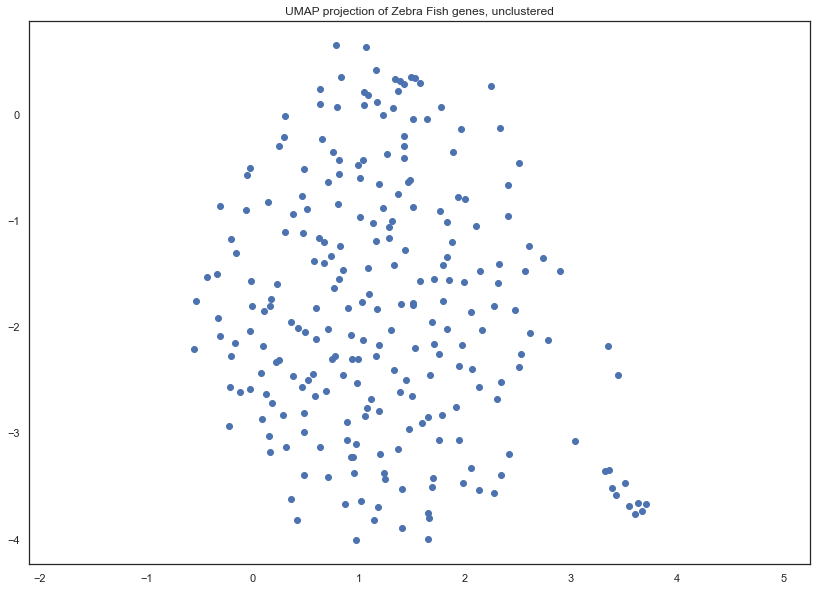

In [16]:
plt.scatter(reduced_genes[:,0],reduced_genes[:,1])
plt.gca().set_aspect('equal','datalim')
plt.title('UMAP projection of Zebra Fish genes, unclustered')
plt.show;

In [17]:
X = norm_vals_scaled
# PCA
pca_mod = PCA(n_components = 7)
data_pca = pca_mod.fit_transform(X)
PCs =pca_mod.components_
PCs.shape

(7, 17432)

In [18]:
UMAP_mod = umap.UMAP(n_neighbors = 7, min_dist = 0.2, n_components = 3).fit_transform(X)

In [19]:
# K means
y_pred = KMeans(n_clusters=7, max_iter=5).fit_predict(X)

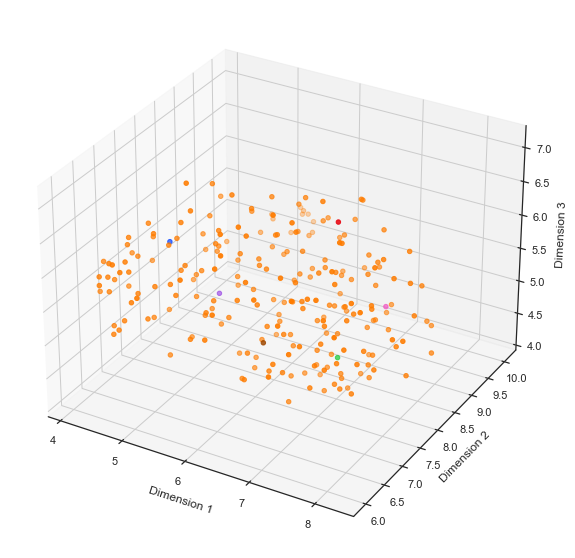

In [20]:
# colors
from matplotlib.colors import ListedColormap
colors = ListedColormap(sns.color_palette('bright', 7).as_hex())
# plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(UMAP_mod[:, 0], UMAP_mod[:, 1],zs= UMAP_mod[:, 2], c=y_pred, cmap= colors, s=20)
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
plt.show()

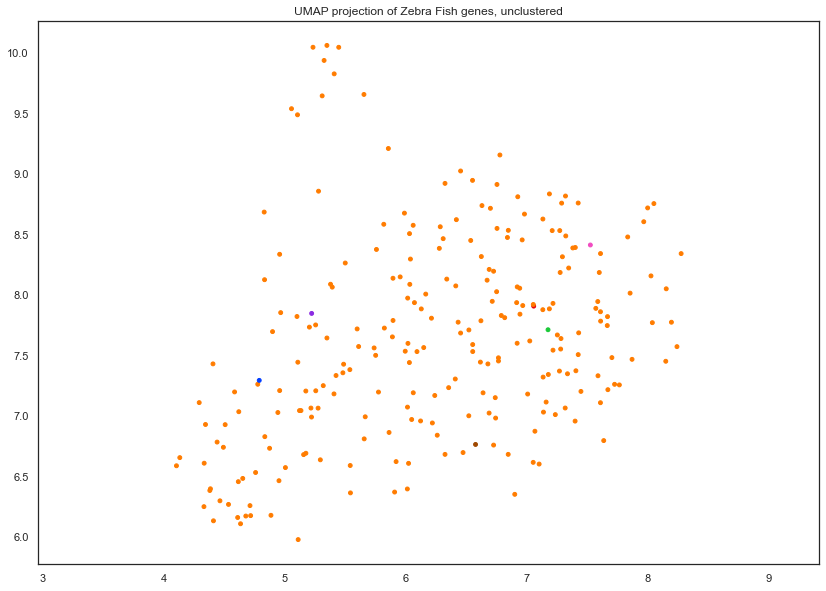

In [21]:
plt.scatter(UMAP_mod[:,0],UMAP_mod[:,1], c = y_pred, cmap = colors, s=15)
plt.gca().set_aspect('equal','datalim')
plt.title('UMAP projection of Zebra Fish genes, unclustered')
plt.show;

## Visualization:
**Overview**
 - The 'base' plot is the 2-D UMAP plot plotted using Altair. 
 - A user can then select a region-of-interest to create the breakout histogram plots of predominate gene ontology

In [22]:
import altair as alt

### Create visualization dataframe:  
**Overview** by creating a dataframe with the reduced dimension data and add in additional properties as necessary (i.e. cluster number, ontology, etc.)  
  
**To-do:**  
 - Add cluster IDs
 - Add gene ontologies
 - Add primary genes?

In [23]:
# Create 'base' dataframe:
column_names = ["UMAP x","UMAP y"]
vis_data = pd.DataFrame(reduced_genes, columns = column_names)

# Add clusters:
vis_data["Clusters"] = y_pred

vis_data.head()

,UMAP x,UMAP y,Clusters
0,3.599591,-3.765070,1
1,3.672565,-3.739609,1
2,2.471506,-1.842746,1
3,3.439812,-2.456677,1
4,0.297115,-0.210999,1


### Create 'master' plot  
**TODO** 
 - Add cluster colors
 - Add IDs when hovering?
 - Add ROI selection

In [24]:
ROI = alt.selection_interval()

scatter = alt.Chart(vis_data).mark_point().encode(
    alt.X('UMAP x',
          scale=alt.Scale(zero=False)
         ),
    alt.Y('UMAP y',
          scale=alt.Scale(zero=False)
         ),
    color = 'Clusters'
    ).add_selection(ROI)

# Show chart for development purpose:
scatter

alt.Chart(...)


### Create histogram plot of ontologies:
**Thoughts:**
 - Altair does seem to be one of the easier plotting systems to select data
 - Altair does not output the indicies of the ROI without an API that may be out there...
 - I can 'transform' the data using:
  - Density Transform | create a vector of all of the ontologies, show a density plot of these ontologies
  - 

In [31]:
# Create the base chart:
hist_base = alt.Chart(vis_data).mark_bar().encode(
    x = 'count()',
    y = 'Clusters',
    color = 'Clusters'
).properties(
    width = 500,
    height = 200
).transform_filter(
    ROI
)

# Filter by interaction:
# hist = hist_base.encode()


# Display for dev purposes:
scatter | hist_base

alt.HConcatChart(...)

### Display tool!
**This is where our interaction is!**

In [26]:
scatter & hist

NameError: name 'hist' is not defined

## Main Dataset

 This is unpublished data from the Gagnon lab from the cell ranger pipeline.  t1 represents testis sample 1.  I loaded the files, cleaned the data and created a (large) csv file to load in.  As discussed in peer feedback, the unpublished data will be shared will a Google Drive link.

In [ ]:
#t1data = io.mmread('matrix.mtx.gz')
#t1arr = t1data.toarray()
#t1col = pd.read_csv('barcodes.tsv.gz', compression = 'gzip', header=None, sep = '\t')
#t1row = pd.read_csv('features.tsv.gz', compression = 'gzip', header=None,sep = '\t')
#t1rows = t1row[1]
#t1cols = []
#for b in t1col[0]:
#    t1cols.append(b)
#t1_counts = pd.DataFrame(t1arr, index = t1rows, columns = t1cols)
#t1_counts.to_csv('t1_counts_data.csv')

# Here is the link to the csv file I generated with the code above

[t1_counts_data.csv](https://drive.google.com/file/d/1aIR4w9TIOnMxziE5aQVjIMAWvqEY6Mvq/view?usp=sharing)

In [8]:
# This is a large dataset, so it may take a while to load
data_counts = pd.read_csv('t1_counts_data.csv', header = 0)
data_counts.set_index('1', inplace = True)

In [9]:
# Define features (genes) and samples (cell_ids)
genes = data_counts.index.values
cell_ids = data_counts.columns
data_counts.head()

,AAACCTGAGCTAGCCC-1,AAACCTGAGCTGCCCA-1,AAACCTGAGGATTCGG-1,AAACCTGAGTTAGCGG-1,AAACCTGCACGGCTAC-1,AAACCTGCAGCTCGCA-1,AAACCTGCAGCTGCTG-1,AAACCTGCAGGAACGT-1,AAACCTGCAGTACACT-1,AAACCTGCATCAGTAC-1,...,TTTGTCACACGTCAGC-1,TTTGTCACAGCCAGAA-1,TTTGTCAGTACACCGC-1,TTTGTCAGTCAAAGAT-1,TTTGTCAGTCCATGAT-1,TTTGTCAGTCTAGAGG-1,TTTGTCATCGCCGTGA-1,TTTGTCATCGCGTTTC-1,TTTGTCATCGGTGTCG-1,TTTGTCATCTGCTGCT-1
1,,,,,,,,,,,,,,,,,,,,,
ptpn12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
phtf2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
phtf2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CU856344.2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CU856344.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
